In [231]:
#Custom
from json_utils import read_jsonl
# Basci EDA.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Customizing Plots
from matplotlib.ticker import MaxNLocator
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches

plt.style.use("fivethirtyeight")

In [2]:
twitter_data = read_jsonl("../data/dkpol_tweets.jsonl")
df_twitter = pd.DataFrame(twitter_data)
df_twitter = df_twitter[df_twitter['in_reply_to_user_id'].isna()]
df_twitter.created_at = pd.to_datetime(df_twitter.created_at)
df_twitter = df_twitter[["text", "entities"]].groupby(df_twitter.created_at.dt.to_period("M")).head(160)

df_pol = pd.read_csv("../data/folketinget_data/folketinget_data_latest.csv", usecols=["merged"])

df_pol = df_pol.rename(columns={"merged":"text"})

Reading ../data/dkpol_tweets.jsonl


/home/carbon/.conda/envs/flow/lib/python3.8/site-packages/pandas/core/arrays/datetimes.py:1088: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


In [3]:
df_twitter[df_twitter["text"].apply(lambda x: len(x)) > 280].iloc[0].text

'Ej hvor godt, hvad om vi sender alverdens flygtninge til Kina, de har masser af plads og tomme boliger nok til hele verdens flygtninge 😀 \nDet må da være løsningen og vil hjælpe store dele af verden og jeg tænker at Kina er med på den for lidt betaling. #dkmedier #dkpol https://t.co/S5Sk6tuF68'

In [149]:
df_twitter

,text,entities,text_len,tokens,token_counts,mean,tags,tags_counts,avg_tag_percentage
0,Det er på tide køreprøver kommer i konkurrence...,"{'hashtags': [{'end': 137, 'start': 131, 'tag'...",162,"[Det, er, på, tide, køreprøver, kommer, i, kon...",23,6.043478,[dkpol],1,0.043478
1,"Min klumme i @berlingske ""I utallige år, især...","{'hashtags': [{'end': 226, 'start': 220, 'tag'...",262,"[Min, klumme, i, @berlingske, ""I, utallige, år...",38,5.842105,"[dkpol, dkmedier]",2,0.052632
3,Denne lille pige var tæt på at dø pga farlige ...,"{'hashtags': [{'end': 155, 'start': 151, 'tag'...",280,"[Denne, lille, pige, var, tæt, på, at, dø, pga...",35,7.000000,"[DSA, eu, dkpol]",3,0.085714
4,I morgen er vi en gruppe folketingsmedlemmer d...,"{'hashtags': [{'end': 255, 'start': 249, 'tag'...",279,"[I, morgen, er, vi, en, gruppe, folketingsmedl...",40,6.000000,[dkpol],1,0.025000
5,⁦@OttesenJeanette⁩ har man fået formeget klorv...,"{'hashtags': [{'end': 70, 'start': 64, 'tag': ...",105,"[⁦@OttesenJeanette⁩, har, man, fået, formeget,...",10,9.500000,[dkpol],1,0.100000
...,...,...,...,...,...,...,...,...,...
89603,I er klar til en gang politisk korrekt centrum...,"{'hashtags': [{'end': 107, 'start': 101, 'tag'...",183,"[I, er, klar, til, en, gang, politisk, korrekt...",22,7.363636,"[dkpol, dkmedier, radio4, radio4dk]",4,0.181818
89604,"""Havde @Spolitik ønsket det, kunne de have ænd...","{'hashtags': [{'end': 106, 'start': 100, 'tag'...",140,"[""Havde, @Spolitik, ønsket, det,, kunne, de, h...",16,7.687500,"[dkpol, dkmedier]",2,0.125000
89605,.@berlingske “dækning” af @24syv har været en ...,"{'hashtags': [{'end': 130, 'start': 121, 'tag'...",190,"[.@berlingske, “dækning”, af, @24syv, har, vær...",24,6.958333,"[dkmedier, dkpol]",2,0.083333
89606,PAPKORTET I NEMID UDFASES\n\n- hvor mange borg...,"{'hashtags': [{'end': 271, 'start': 265, 'tag'...",302,"[PAPKORTET, I, NEMID, UDFASES, -, hvor, mange,...",47,5.361702,"[itpol, dkpol]",2,0.042553


In [4]:
print(df_twitter.shape)
print(df_pol.shape)

(4480, 2)
(1664, 1)


# 1. Visualization
## 1.1 Data Distribution

In [5]:
len(df_pol)

1664

In [6]:
len(df_twitter)

4480

In [234]:
def plot_data_distribution(df1, df2, name1, name2):
    fig = sns.set(rc={'figure.figsize':(6,6)})
    sns.barplot(x=[name1, name2], y=[len(df1), len(df2)], palette=["#1DA1F2", "#a6192e"]).set_title('Dataset Distribution', fontsize=16)
    plt.xlabel("Data Sets", fontsize=12)
    plt.ylabel("Counts", fontsize=12).set_rotation(0)


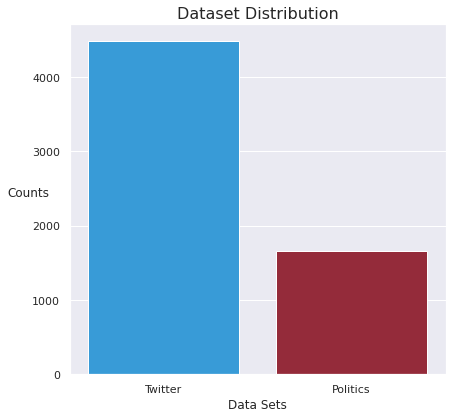

In [235]:
plot_data_distribution(df_twitter, df_pol, "Twitter", "Politics")

## 1.2 Text Character Length Distribution

In [9]:
def get_text_len(df):
    df["text_len"] = df["text"].apply(lambda x: len(x))
    return df

In [10]:
df_twitter = get_text_len(df_twitter)
df_pol = get_text_len(df_pol)

In [244]:
def plot_hist_boxplot(df1, df2, feature, title):
    fig = plt.figure(tight_layout=True, figsize=(18, 10))
    grid = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)
    
    ax1 = fig.add_subplot(grid[0, :2])
    ax1.set_title("Twitter", fontsize=18)
    sns.distplot(df1.loc[:, feature],
                hist=True,
                kde=True,
                ax=ax1,
                color="#1DA1F2",
                hist_kws=dict(alpha=1))
    ax1.xaxis.set_major_locator(MaxNLocator(nbins=20))
    ax1.set_xlabel('Text Length', fontsize = 14)
    ax1.set_ylabel('Density', fontsize = 14)


    # Customizing the ecdf_plot.
    ax2 = fig.add_subplot(grid[1, :2])
    # Set the title.
    ax2.set_title('Folketinget', fontsize=18)
    # Plotting the ecdf_Plot.
    sns.distplot(df2.loc[:, feature],
                 ax=ax2,
                 hist=True,
                 kde=True,
                 color='#a6192e',
                hist_kws=dict(alpha=1))
    ax2.xaxis.set_major_locator(MaxNLocator(nbins=20))
    ax2.set_xlabel('Text Length', fontsize = 14)
    ax2.set_ylabel('Density', fontsize = 14)

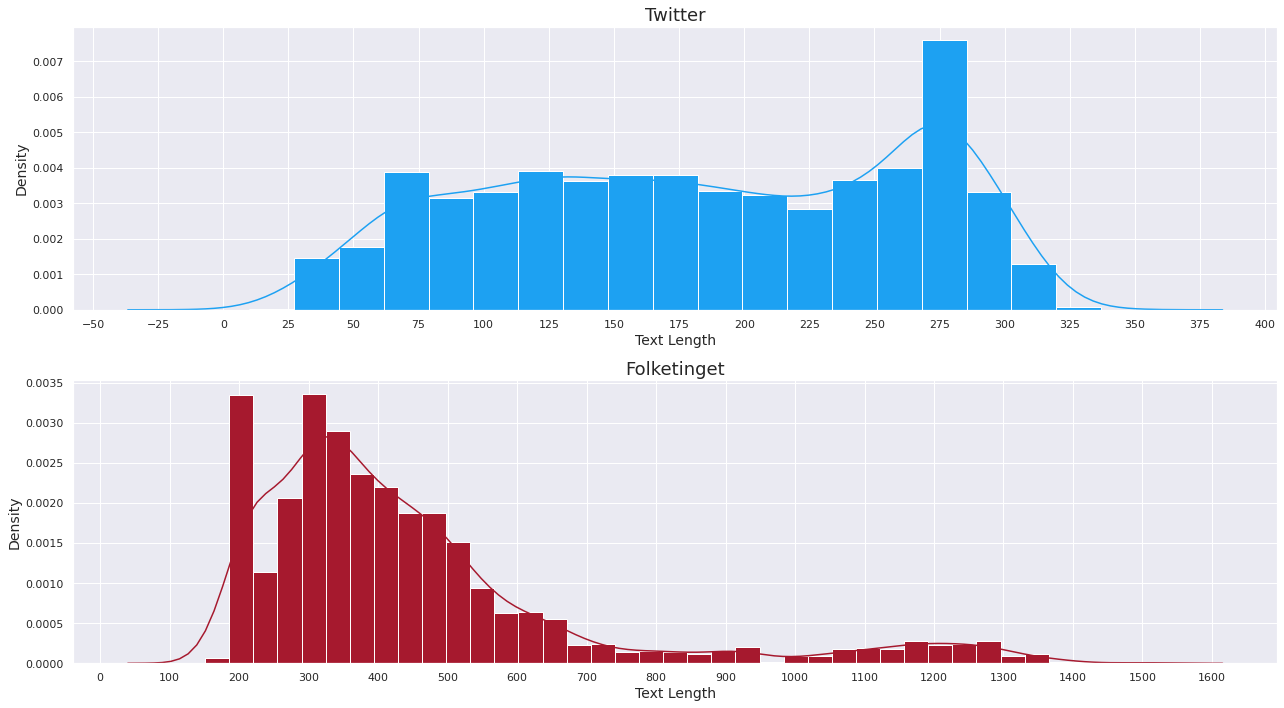

In [245]:
plot_hist_boxplot(df_twitter, df_pol, "text_len", "Characters Per Text Histograms")

# 1.3 Word Counts

In [163]:
def tokenize_on_spaces(df):
    df["tokens"] = df["text"].apply(lambda x: x.split())
    return df

In [14]:
df_twitter = tokenize_on_spaces(df_twitter)
df_pol = tokenize_on_spaces(df_pol)

In [15]:
def get_token_counts(df):
    df["token_counts"] = df["tokens"].apply(lambda x: len(x))
    return df

In [16]:
df_twitter = get_token_counts(df_twitter)
df_pol = get_token_counts(df_pol)

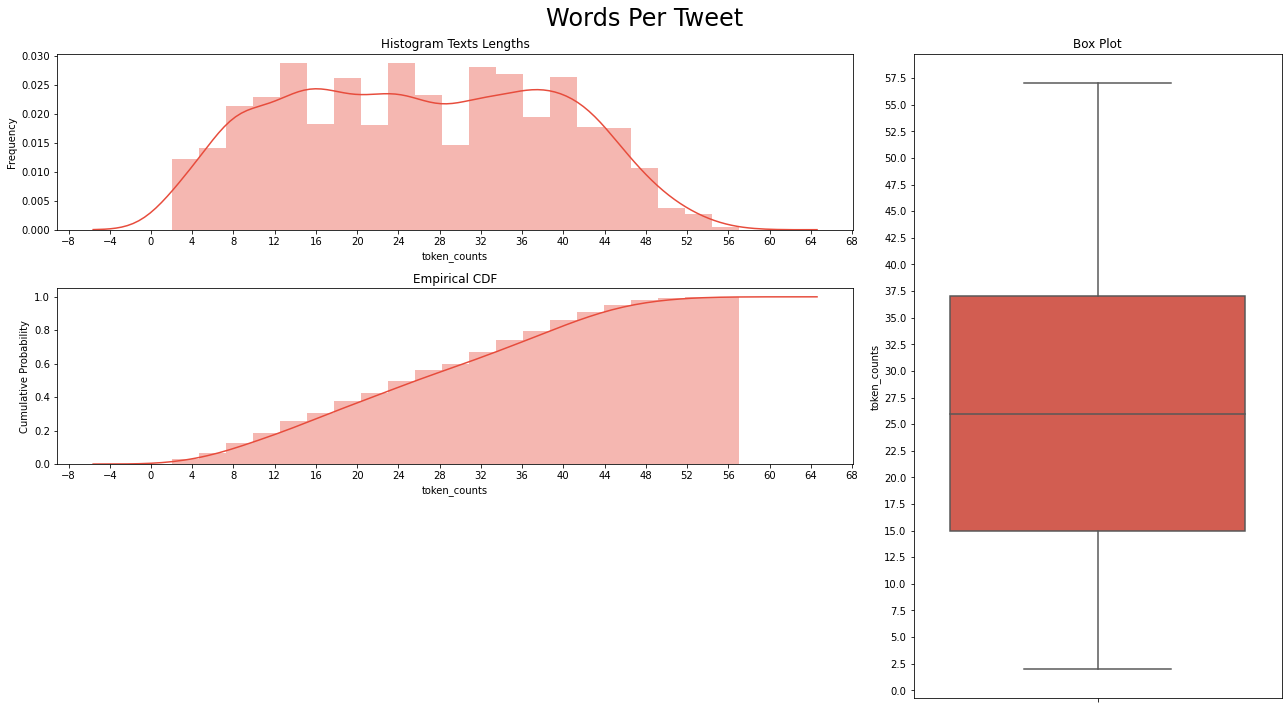

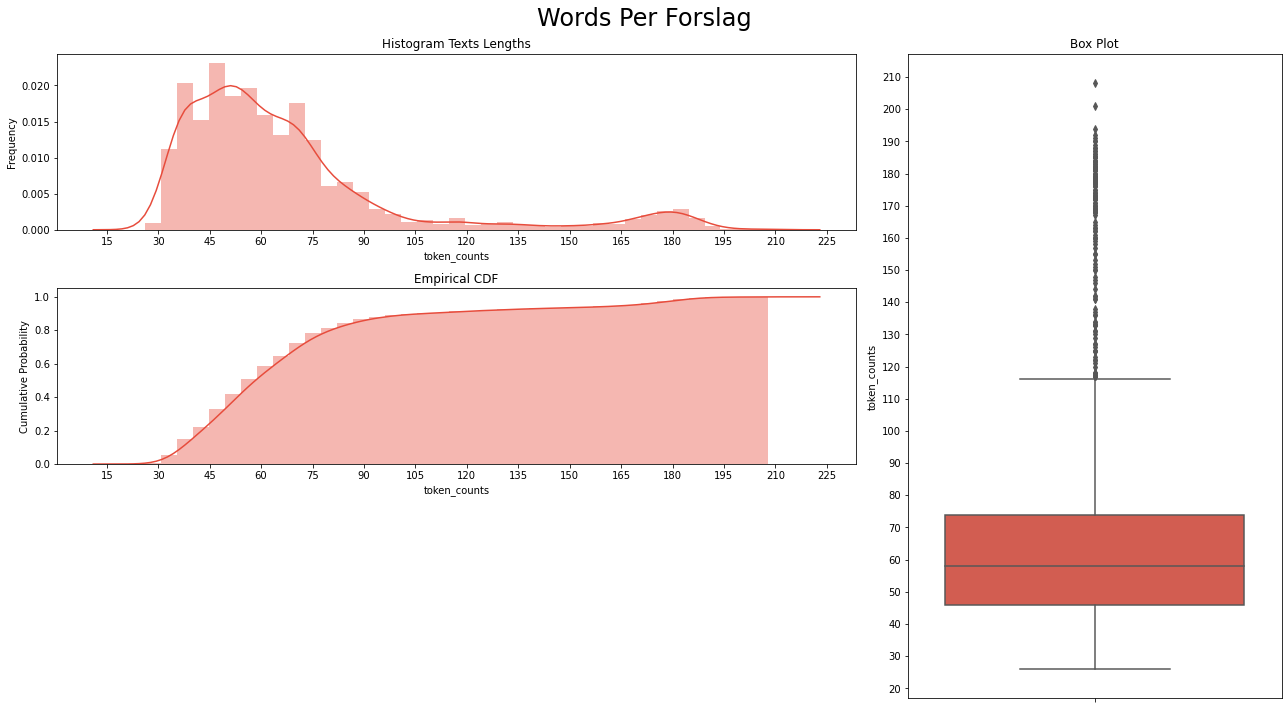

In [17]:
plot_hist_boxplot(df_twitter, "token_counts", "Words Per Tweet")
plot_hist_boxplot(df_pol, "token_counts", "Words Per Forslag")

## 1.4 Mean Word Lengths

In [18]:
def get_mean_word_length(df):
    df["mean"] = df["tokens"].apply(lambda x: [len(i) for i in x]).map(lambda x: np.mean(x))
    return df

In [19]:
df_twitter = get_mean_word_length(df_twitter)
df_pol = get_mean_word_length(df_pol)

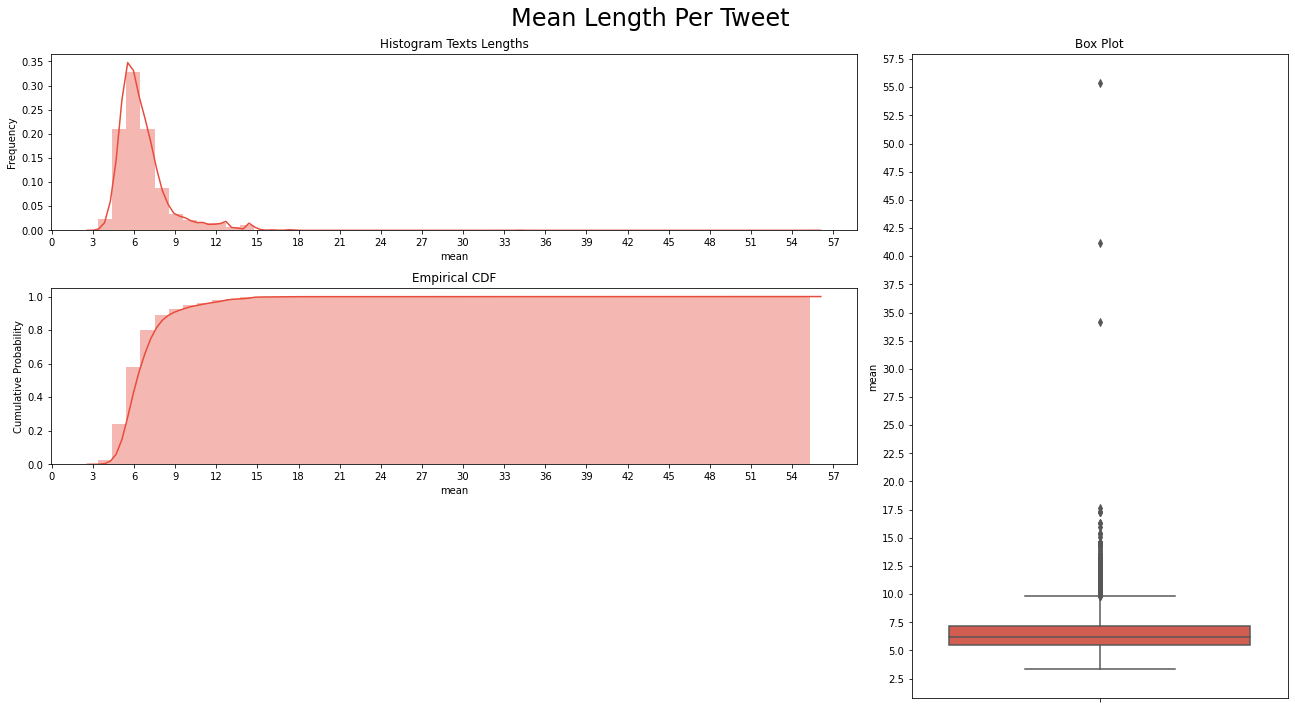

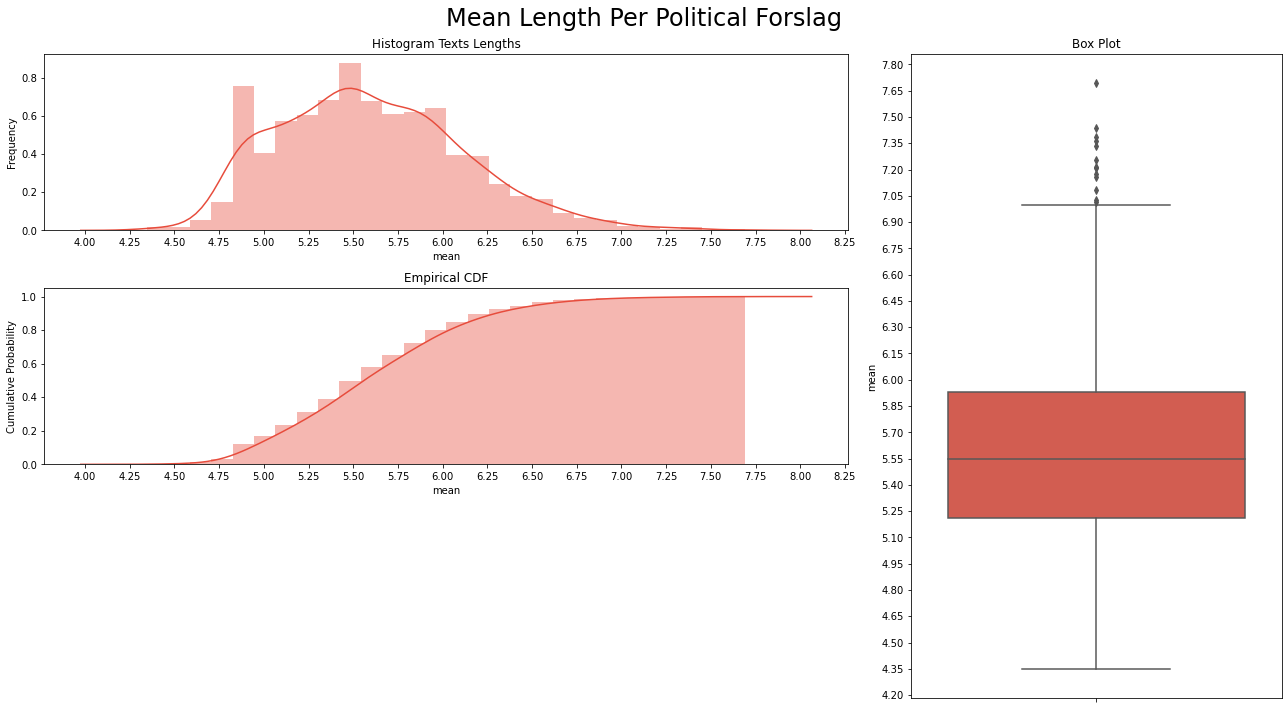

In [20]:
plot_hist_boxplot(df_twitter, "mean", "Mean Length Per Tweet")
plot_hist_boxplot(df_pol, "mean", "Mean Length Per Political Forslag")

In [21]:
df_twitter

,text,entities,text_len,tokens,token_counts,mean
0,Det er på tide køreprøver kommer i konkurrence...,"{'hashtags': [{'end': 137, 'start': 131, 'tag'...",162,"[Det, er, på, tide, køreprøver, kommer, i, kon...",23,6.043478
1,"Min klumme i @berlingske ""I utallige år, især...","{'hashtags': [{'end': 226, 'start': 220, 'tag'...",262,"[Min, klumme, i, @berlingske, ""I, utallige, år...",38,5.842105
3,Denne lille pige var tæt på at dø pga farlige ...,"{'hashtags': [{'end': 155, 'start': 151, 'tag'...",280,"[Denne, lille, pige, var, tæt, på, at, dø, pga...",35,7.000000
4,I morgen er vi en gruppe folketingsmedlemmer d...,"{'hashtags': [{'end': 255, 'start': 249, 'tag'...",279,"[I, morgen, er, vi, en, gruppe, folketingsmedl...",40,6.000000
5,⁦@OttesenJeanette⁩ har man fået formeget klorv...,"{'hashtags': [{'end': 70, 'start': 64, 'tag': ...",105,"[⁦@OttesenJeanette⁩, har, man, fået, formeget,...",10,9.500000
...,...,...,...,...,...,...
89603,I er klar til en gang politisk korrekt centrum...,"{'hashtags': [{'end': 107, 'start': 101, 'tag'...",183,"[I, er, klar, til, en, gang, politisk, korrekt...",22,7.363636
89604,"""Havde @Spolitik ønsket det, kunne de have ænd...","{'hashtags': [{'end': 106, 'start': 100, 'tag'...",140,"[""Havde, @Spolitik, ønsket, det,, kunne, de, h...",16,7.687500
89605,.@berlingske “dækning” af @24syv har været en ...,"{'hashtags': [{'end': 130, 'start': 121, 'tag'...",190,"[.@berlingske, “dækning”, af, @24syv, har, vær...",24,6.958333
89606,PAPKORTET I NEMID UDFASES\n\n- hvor mange borg...,"{'hashtags': [{'end': 271, 'start': 265, 'tag'...",302,"[PAPKORTET, I, NEMID, UDFASES, -, hvor, mange,...",47,5.361702


In [22]:
def get_hashtags(row):
    tags = []
    try:
        for tag in row["hashtags"]:
            tags.append(tag["tag"])
        return tags
    except:
        return []
    
df_twitter["tags"] = df_twitter["entities"].apply(lambda x: get_hashtags(x))

In [23]:
def tags_counts(df):
    df["tags_counts"] = df["tags"].apply(lambda x: len(x))
    return df

In [24]:
def calc_avg_number_of_tags(df):
    df = tags_counts(df)
    return sum(df["tags_counts"])/len(df)
    
    
print(calc_avg_number_of_tags(df_twitter))

#verify
print(df_twitter["tags_counts"].mean())


2.541517857142857
2.541517857142857


In [25]:
def avg_percentage_of_tags_of_words(df):
    total_tokens = sum(df["token_counts"])
    total_tags = sum(df["tags_counts"])

    return total_tags/total_tokens

In [26]:
print(avg_percentage_of_tags_of_words(df_twitter))

0.09785401823697758


In [27]:
def f(token_counts, tags_counts):
    return tags_counts/token_counts
df_twitter['avg_tag_percentage'] = df_twitter[['token_counts','tags_counts']].apply(lambda x: f(*x), axis=1)

In [28]:
df_twitter["avg_tag_percentage"].mean()

0.1384156765783802